In [ ]:
! git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 7.18 MiB/s, done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/


dev.txt  test.txt  train.txt


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [ ]:
def get_lines(filename):
  with open(filename , "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()


      for abstract_line_number , abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples




In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

print(len(train_samples))
print(len(val_samples))
print(len(test_samples))

180040
30212
30135


In [ ]:
train_samples[:12]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

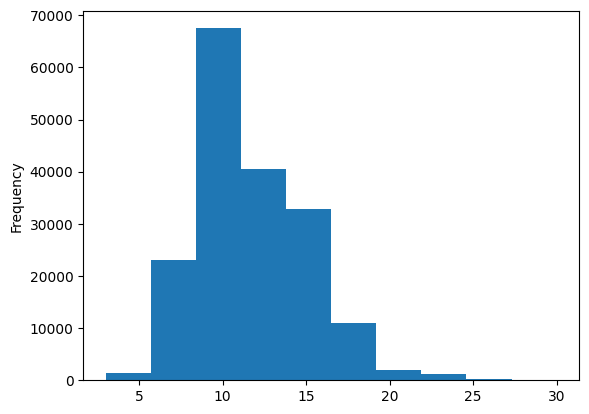

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()



In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1 , 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1 , 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1 , 1))


train_labels_one_hot

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes , class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Model 0 : Creating a baseline model with Naive Bayes Classifier and TF-IDF Encoder

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ("tf-idf" , TfidfVectorizer()) , 
    ("clf" , MultinomialNB())
])


In [ ]:
model_0.fit(X=train_sentences , y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences , y=val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-27 15:19:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-27 15:19:32 (97.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels_encoded , y_pred = baseline_preds)

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

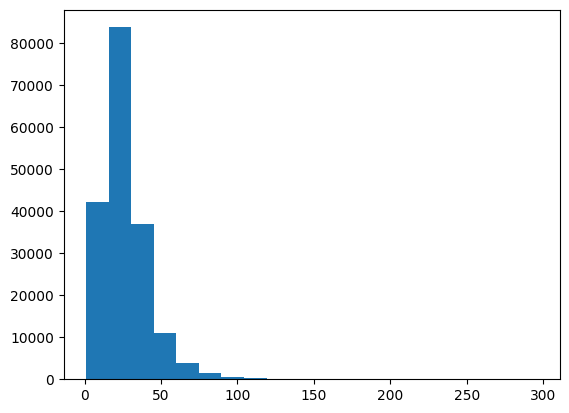

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens , bins=20)

In [ ]:
output_seq_len = int(np.percentile(sent_lens , 95))
output_seq_len

55

In [ ]:
max(sent_lens)

296

In [ ]:
max_tokens = 68000

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens , output_sequence_length = output_seq_len)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence = random.choice(train_sentences)

print(f"Text : \n {target_sentence}")
print(f"\nLength of text : {len(target_sentence.split())}")
print(f"\nVectorized text : {text_vectorizer([target_sentence])}")

Text : 
 these findings show that price modifications can directly increase produce purchases .

Length of text : 12

Vectorized text : [[  111   310   812    28  9082  4943   171  1910   179  2588 13034     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab : {len(rct_20k_text_vocab)}")
print(f"Most commom words in vocab : {rct_20k_text_vocab[:5]}")
print(f"Least common words in vocab ; {rct_20k_text_vocab[-5:]}")

Number of words in vocab : 64841
Most commom words in vocab : ['', '[UNK]', 'the', 'and', 'of']
Least common words in vocab ; ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab) , output_dim=128 , mask_zero=True , name="token_embedding")

In [ ]:
print(f"Sentence before vectorization : \n {target_sentence} \n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization before embedding : \n {vectorized_sentence} \n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding : \n {embedded_sentence} \n")
print(f" Embedding Sentence shape : \n {embedded_sentence.shape} \n")


Sentence before vectorization : 
 these findings show that price modifications can directly increase produce purchases . 

Sentence after vectorization before embedding : 
 [[  111   310   812    28  9082  4943   171  1910   179  2588 13034     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]] 

Sentence after embedding : 
 [[[ 0.03834086 -0.02148557  0.01091256 ... -0.03646679 -0.02425575
   -0.01013993]
  [-0.04193471 -0.03821186  0.04809383 ...  0.03305716  0.01781633
   -0.00583541]
  [ 0.00897651 -0.02824992  0.0191664  ... -0.03770842 -0.0402757
    0.01415643]
  ...
  [ 0.03790725  0.01389292  0.03837818 ...  0.01334624  0.04184647
    0.01746973]
  [ 0.03790725  0.01389292  0.03837818 ...  0.01334624  0.04184647
    0.01746973]
  [ 0.03790725  0.01389292  0.0383

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences , train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences , val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences , test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1 : Conv1D with token embedding

In [ ]:
inputs = layers.Input(shape=(1,) , dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64 , kernel_size=5 , padding="same" , activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes , activation="softmax")(x)

model_1 = tf.keras.Model(inputs , outputs)

model_1.compile(loss="categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam() , metrics = ["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
history_model_1 = model_1.fit(train_dataset , steps_per_epoch=int(0.1 * len(train_dataset)) , epochs=3 , validation_data=val_dataset , 
                              validation_steps=int(0.1 * len(val_dataset)) )

Epoch 1/3
562/562 [==============================] - 44s 60ms/step - loss: 0.9147 - accuracy: 0.6410 - val_loss: 0.6820 - val_accuracy: 0.7390
Epoch 2/3
562/562 [==============================] - 10s 17ms/step - loss: 0.6569 - accuracy: 0.7553 - val_loss: 0.6303 - val_accuracy: 0.7713
Epoch 3/3
562/562 [==============================] - 6s 9ms/step - loss: 0.6171 - accuracy: 0.7703 - val_loss: 0.5978 - val_accuracy: 0.7849


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5995 - accuracy: 0.7862


[0.5994986295700073, 0.7862438559532166]

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[4.0547380e-01, 1.4426467e-01, 7.1762241e-02, 3.5222852e-01,
        2.6270853e-02],
       [4.8224103e-01, 2.3039210e-01, 1.6198993e-02, 2.6255554e-01,
        8.6122947e-03],
       [1.8553090e-01, 4.9125762e-03, 1.6691245e-03, 8.0784017e-01,
        4.7283669e-05],
       ...,
       [5.5045766e-06, 5.1562715e-04, 5.4201332e-04, 6.8663071e-06,
        9.9892992e-01],
       [6.4881004e-02, 5.1157486e-01, 8.3731905e-02, 6.5429464e-02,
        2.7438274e-01],
       [1.3478036e-01, 7.2984844e-01, 4.6841849e-02, 3.6339205e-02,
        5.2190114e-02]], dtype=float32)

In [ ]:
model_1_pred_probs.shape

(30212, 5)

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs , axis=1)

In [ ]:
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results = calculate_results(y_true = val_labels_encoded , y_pred = model_1_preds)
model_1_results

{'accuracy': 78.62438766053224,
 'precision': 0.7831758873922925,
 'recall': 0.7862438766053224,
 'f1': 0.7839116518083032}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2 : Feature Extraction with Pre Trained token embeddings

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4" , trainable=False , 
                                        name="universal_sentence_encoder")

In [ ]:
random_train_sentence = random.choice(train_sentences)
print(f"Random Sentence : \n {random_train_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Sentence after embedding : \n {use_embedded_sentence}")
print(f"Length of Sentence embedding : \n {len(use_embedded_sentence)}")


Random Sentence : 
 the aim of this study was to evaluate the effects of pidotimod on rri prevention in children .
Sentence after embedding : 
 [[ 8.1605546e-02  3.9504863e-02 -1.2971944e-02 -8.7412134e-02
  -9.1612704e-02  4.2947579e-02 -3.9775942e-02  5.1623035e-02
   5.5105062e-03  2.3198275e-02  2.9943869e-02 -1.1491644e-02
   6.5760471e-02 -2.6709760e-02 -7.8823073e-03  3.4669619e-02
  -9.7314544e-02 -7.1211997e-03  6.4402851e-03 -9.0015292e-02
  -4.8374303e-02 -2.1504933e-02 -4.2814028e-02 -6.2263049e-02
   2.9866148e-02 -5.0384969e-02  3.1996086e-02 -1.9098371e-02
   6.1001647e-02  5.5844687e-02 -2.2662988e-02  8.2743011e-02
   5.7171669e-02  2.4442768e-02 -3.6517857e-03  1.5657464e-03
  -2.1888221e-02 -4.0961426e-02  4.7531407e-02 -7.7202104e-02
   2.9473972e-02  6.4909875e-02 -2.0032089e-02  5.7488233e-03
  -8.2871094e-03  2.0251857e-02 -1.5509406e-02  7.4195780e-02
   2.7979195e-02 -2.3360228e-02  8.3632320e-03  4.8087612e-02
   2.0943472e-02  4.6502277e-02  7.2096899e-02  1.

In [ ]:
inputs = layers.Input(shape=[] , dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128 , activation="relu")(pretrained_embedding)
outputs = layers.Dense(num_classes , activation="softmax")(x)

model_2 = tf.keras.Model(inputs=inputs , outputs=outputs , name="model_2_USE_feature_extractor")

model_2.compile(loss="categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam() , metrics = ["accuracy"])


In [ ]:
model_2.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_model_2 = model_2.fit(train_dataset , steps_per_epoch=int(0.1 * len(train_dataset)) , epochs=3 , validation_data=val_dataset , 
                              validation_steps=int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 11s 14ms/step - loss: 0.9151 - accuracy: 0.6488 - val_loss: 0.7944 - val_accuracy: 0.6888
Epoch 2/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7669 - accuracy: 0.7037 - val_loss: 0.7522 - val_accuracy: 0.7084
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7496 - accuracy: 0.7137 - val_loss: 0.7364 - val_accuracy: 0.7151


In [ ]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.7387 - accuracy: 0.7153


[0.7386664152145386, 0.7153449058532715]

In [ ]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_pred_probs

945/945 [==============================] - 11s 11ms/step


array([[4.1859305e-01, 3.4794295e-01, 2.4543223e-03, 2.2191375e-01,
        9.0959314e-03],
       [3.4553462e-01, 4.6824911e-01, 4.6638623e-03, 1.7797211e-01,
        3.5802270e-03],
       [2.4220785e-01, 1.4700425e-01, 1.6388126e-02, 5.5596662e-01,
        3.8433116e-02],
       ...,
       [1.7042214e-03, 5.5896803e-03, 5.4860510e-02, 8.2760653e-04,
        9.3701804e-01],
       [3.9698486e-03, 4.9862914e-02, 2.2422603e-01, 1.2355585e-03,
        7.2070563e-01],
       [1.7288391e-01, 2.6743910e-01, 4.8809111e-01, 7.1525034e-03,
        6.4433329e-02]], dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs , axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(y_true = val_labels_encoded , y_pred = model_2_preds)
model_2_results

{'accuracy': 71.53448960677876,
 'precision': 0.7159744554203455,
 'recall': 0.7153448960677876,
 'f1': 0.712617689947368}

## Model 3 : Conv1D with character embeddings


In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
split_chars(random_train_sentence)

't h e   a i m   o f   t h i s   s t u d y   w a s   t o   e v a l u a t e   t h e   e f f e c t s   o f   p i d o t i m o d   o n   r r i   p r e v e n t i o n   i n   c h i l d r e n   .'

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_lens = np.mean(char_lens)
mean_char_lens

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

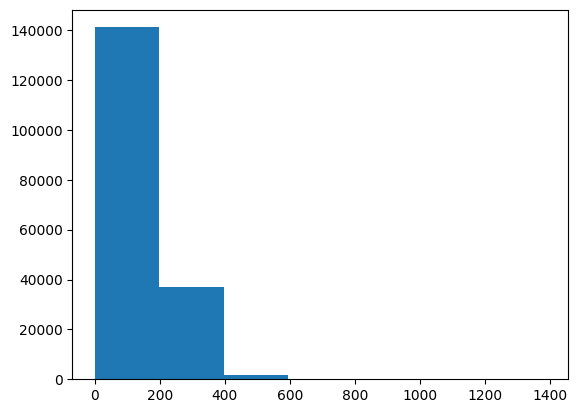

In [ ]:
import matplotlib.pyplot as plt

plt.hist(char_lens , bins=7)

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
output_seq_char_len = int(np.percentile(char_lens , 95))
output_seq_char_len

290

In [ ]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS , output_sequence_length=output_seq_char_len , 
                                    standardize="lower_and_strip_punctuation", name="char_vectorizer")


In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different charcaters in character vocab : {len(char_vocab)}")
print(f"5 most common character : {char_vocab[:5]}")
print(f"5 least common character : {char_vocab[-5]}")


Number of different charcaters in character vocab : 28
5 most common character : ['', '[UNK]', 'e', 't', 'i']
5 least common character : k


In [ ]:
random_train_chars = random.choice(train_chars)
print(f"Clarified Text : \n {random_train_chars}")
print(f"Length of random_train_chars : {len(random_train_chars.split())}")

vectorized_chars = char_vectorizer([random_train_chars])
print(f"Vectorized Text : \n {vectorized_chars}")
print(f"Length of vectorized_chars : {len(vectorized_chars[0])}")

Clarified Text : 
 e l i g i b l e   p a t i e n t s   r e c e i v e d   r a m u c i r u m a b   (   @ m g / k g   )   +   d a c a r b a z i n e   (   @   m g / m   (   @   )   )   (   a r m   a   )   o r   r a m u c i r u m a b   o n l y   (   @ m g / k g   )   (   a r m   b   )   e v e r y   @   w e e k s   .
Length of random_train_chars : 114
Vectorized Text : 
 [[ 2 12  4 18  4 22 12  2 14  5  3  4  2  6  3  9  8  2 11  2  4 21  2 10
   8  5 15 16 11  4  8 16 15  5 22 15 18 23 18 10  5 11  5  8 22  5 25  4
   6  2 15 18 15  5  8 15  5  7  8  8  5 15 16 11  4  8 16 15  5 22  7  6
  12 19 15 18 23 18  5  8 15 22  2 21  2  8 19 20  2  2 23  9  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
char_embed =  layers.Embedding(input_dim = len(char_vocab) , output_dim = 25 , mask_zero = True , name="char_embed")

In [ ]:
print(f"Charified text : \n {random_train_chars} \n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars . After vectorization and embedding : \n {char_embed_example}")
print(f"Character embedding shape : {char_embed_example.shape}")

Charified text : 
 e l i g i b l e   p a t i e n t s   r e c e i v e d   r a m u c i r u m a b   (   @ m g / k g   )   +   d a c a r b a z i n e   (   @   m g / m   (   @   )   )   (   a r m   a   )   o r   r a m u c i r u m a b   o n l y   (   @ m g / k g   )   (   a r m   b   )   e v e r y   @   w e e k s   . 

Embedded chars . After vectorization and embedding : 
 [[[-0.01146913  0.01738827 -0.0274598  ... -0.04718792 -0.04406076
   -0.00609268]
  [ 0.04191973  0.04787209  0.04136771 ...  0.02224705 -0.0153173
    0.00599486]
  [-0.04708361  0.03934984 -0.02507981 ...  0.01519911  0.00718196
   -0.00936528]
  ...
  [ 0.04865653 -0.02106943  0.00658626 ...  0.03255931 -0.00511653
   -0.040063  ]
  [ 0.04865653 -0.02106943  0.00658626 ...  0.03255931 -0.00511653
   -0.040063  ]
  [ 0.04865653 -0.02106943  0.00658626 ...  0.03255931 -0.00511653
   -0.040063  ]]]
Character embedding shape : (1, 290, 25)


In [ ]:
inputs = layers.Input(shape=(1,) , dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64 , kernel_size=5 , padding="same" , activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes , activation="softmax")(x)

model_3 = tf.keras.Model(inputs , outputs , name="model_3_conv1d_char_embedding")

model_3.compile(loss="categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam() , metrics = ["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars , train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars , val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars , test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_model_3 = model_3.fit(train_char_dataset , steps_per_epoch=int(0.1 * len(train_char_dataset)) , epochs=3 , validation_data=val_char_dataset , 
                              validation_steps=int(0.1 * len(val_char_dataset)) )

Epoch 1/3
562/562 [==============================] - 6s 8ms/step - loss: 1.2860 - accuracy: 0.4838 - val_loss: 1.0682 - val_accuracy: 0.5858
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0195 - accuracy: 0.5960 - val_loss: 0.9513 - val_accuracy: 0.6307
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9420 - accuracy: 0.6300 - val_loss: 0.8811 - val_accuracy: 0.6636


In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.24085714, 0.38296267, 0.10037032, 0.19610694, 0.07970294],
       [0.13329843, 0.6865839 , 0.02815125, 0.09625943, 0.05570706],
       [0.09111553, 0.1968003 , 0.44866896, 0.2184377 , 0.04497755],
       ...,
       [0.01574462, 0.0330167 , 0.1644671 , 0.0181887 , 0.7685829 ],
       [0.02716989, 0.18036743, 0.11426497, 0.05203857, 0.6261592 ],
       [0.38348025, 0.4968337 , 0.04472451, 0.05808413, 0.01687742]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs , axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 2, ..., 4, 4, 1])>

In [ ]:
model_3_results = calculate_results(y_true = val_labels_encoded , y_pred = model_3_preds)
model_3_results

{'accuracy': 65.21580828809745,
 'precision': 0.6490049416620172,
 'recall': 0.6521580828809744,
 'f1': 0.639626144870903}

## Model 4 : Combined pre trained token embeddings + character embedding

In [ ]:
token_inputs = layers.Input(shape=[] , dtype=tf.string , name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128 , activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs , outputs=token_output)

char_inputs = layers.Input(shape=(1,) , dtype=tf.string , name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs , outputs=char_bi_lstm)

token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output , char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128 , activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes , activation="softmax")(final_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input , char_model.input] , outputs=output_layer , name="model_4_token_and_char_embeddings")



In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

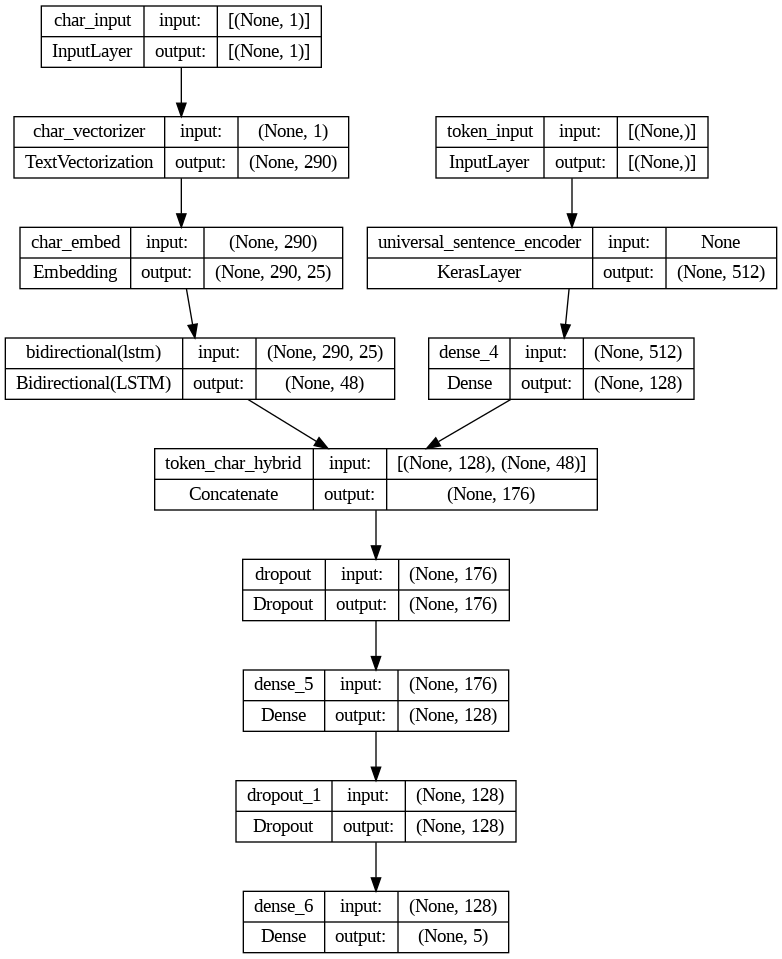

In [ ]:
from keras.utils import plot_model
plot_model(model_4 , show_shapes=True)

In [ ]:
model_4.compile(loss="categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam() , metrics = ["accuracy"])

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences , train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data , train_char_token_labels))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)  



val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences , val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data , val_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)  

In [ ]:
train_char_token_dataset , val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
history_model_4 = model_4.fit(train_char_token_dataset , steps_per_epoch=int(0.1 * len(train_char_token_dataset)) , 
                              epochs=3 , validation_data=val_char_token_dataset , 
                              validation_steps=int(0.1 * len(val_char_token_dataset)) )

Epoch 1/3
562/562 [==============================] - 43s 58ms/step - loss: 0.9802 - accuracy: 0.6118 - val_loss: 0.7827 - val_accuracy: 0.7001
Epoch 2/3
562/562 [==============================] - 30s 54ms/step - loss: 0.8033 - accuracy: 0.6916 - val_loss: 0.7279 - val_accuracy: 0.7227
Epoch 3/3
562/562 [==============================] - 32s 58ms/step - loss: 0.7757 - accuracy: 0.7041 - val_loss: 0.6933 - val_accuracy: 0.7367


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 23s 24ms/step - loss: 0.6940 - accuracy: 0.7348


[0.6940369606018066, 0.734840452671051]

In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 23s 21ms/step


array([[3.9177373e-01, 3.9049262e-01, 5.5806297e-03, 2.0559578e-01,
        6.5572560e-03],
       [3.5668176e-01, 4.0089774e-01, 4.0313019e-03, 2.3535076e-01,
        3.0383943e-03],
       [2.8992131e-01, 1.4100237e-01, 4.3339550e-02, 5.0290626e-01,
        2.2830529e-02],
       ...,
       [8.3716342e-04, 9.1860238e-03, 4.7608927e-02, 3.5503280e-04,
        9.4201291e-01],
       [6.2764701e-03, 4.3871470e-02, 2.0965153e-01, 3.6262146e-03,
        7.3657435e-01],
       [2.9877234e-01, 3.8317069e-01, 2.3557711e-01, 3.4214769e-02,
        4.8265107e-02]], dtype=float32)

In [ ]:
model_4_preds = tf.argmax(model_4_pred_probs , axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_4_results = calculate_results(y_true = val_labels_encoded , y_pred = model_4_preds)
model_4_results

{'accuracy': 73.48404607440752,
 'precision': 0.7332518089138131,
 'recall': 0.7348404607440752,
 'f1': 0.7318960098190235}

## Model 5 : Transfer Learning with pre trained token embedding + character embedding + positional embedding

In [ ]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

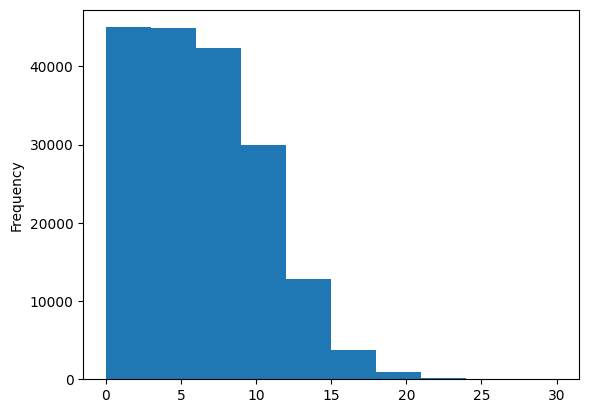

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy() , depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy() , depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy() , depth=15)


train_line_numbers_one_hot[:10] , train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [ ]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<Axes: ylabel='Frequency'>

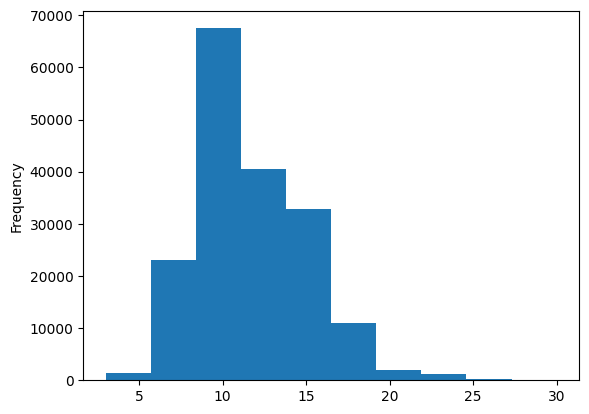

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
np.percentile(train_df.total_lines , 95)

18.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy() ,depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy() ,depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy() ,depth=20)


train_total_lines_one_hot.shape , train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [ ]:
token_inputs = layers.Input(shape=[] , dtype="string" , name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128 , activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs , outputs=token_outputs)

char_inputs = layers.Input(shape=(1,) , dtype="string" , name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs , outputs=char_bi_lstm)

line_number_inputs = layers.Input(shape=[15,] , dtype=tf.float32 , name="line_number_inputs")
x = layers.Dense(32 , activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs , outputs=x)

total_lines_inputs = layers.Input(shape=[20,] , dtype=tf.float32 , name="total_lines_inputs")
y = layers.Dense(32 , activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs , outputs=y)

combined_embedding = layers.Concatenate(name="char_token_hybrid_embedding" )([token_model.output , char_model.output])

z = layers.Dense(256 , activation="relu")(combined_embedding)
z = layers.Dropout(0.5)(z)

tribrid_embedding = layers.Concatenate(name="char_token_positional_embedding" )([line_number_model.output , total_line_model.output , z])

output_layer = layers.Dense(5 , activation="softmax" , name="output_layer")(tribrid_embedding)

model_5 = tf.keras.Model(inputs=[line_number_model.input , total_line_model.input , token_model.input , char_model.input] , outputs=output_layer)

In [ ]:
model_5.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']     

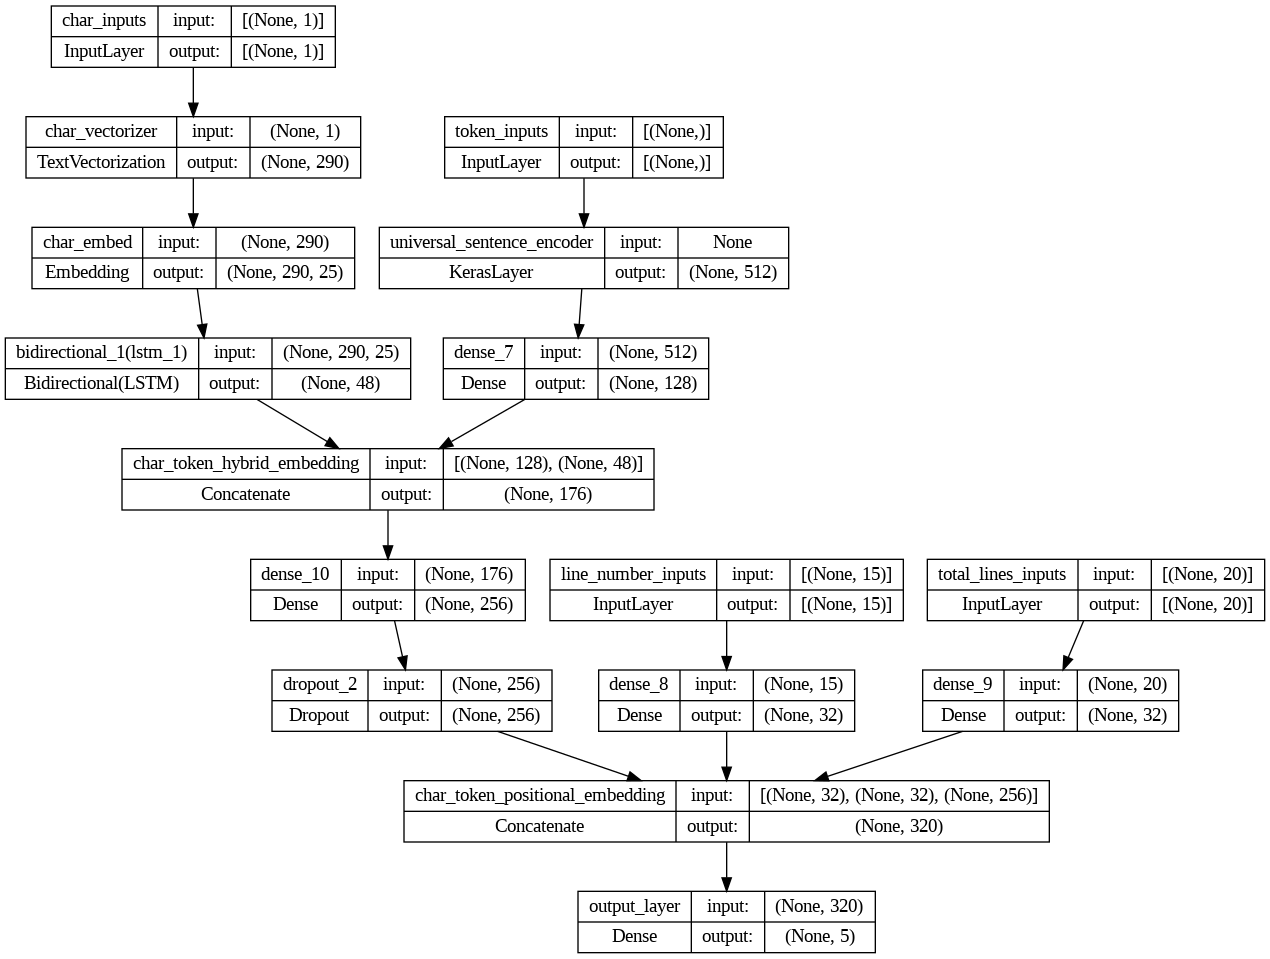

In [ ]:
plot_model(model_5 , show_shapes=True)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2) ,
                optimizer=tf.keras.optimizers.Adam() , metrics = ["accuracy"] )

In [ ]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot , train_total_lines_one_hot , 
                                                                train_sentences , train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset =  tf.data.Dataset.zip((train_char_token_pos_data , train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot , val_total_lines_one_hot , 
                                                                val_sentences , val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset =  tf.data.Dataset.zip((val_char_token_pos_data , val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_pos_dataset , val_char_token_pos_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
history_model_5 = model_5.fit(train_char_token_pos_dataset , steps_per_epoch=int(0.1 * len(train_char_token_pos_dataset)) , 
                              epochs=3 , validation_data=val_char_token_pos_dataset , 
                              validation_steps=int(0.1 * len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 42s 56ms/step - loss: 1.0974 - accuracy: 0.7240 - val_loss: 0.9837 - val_accuracy: 0.8015
Epoch 2/3
562/562 [==============================] - 30s 53ms/step - loss: 0.9661 - accuracy: 0.8148 - val_loss: 0.9506 - val_accuracy: 0.8211
Epoch 3/3
562/562 [==============================] - 26s 46ms/step - loss: 0.9500 - accuracy: 0.8252 - val_loss: 0.9393 - val_accuracy: 0.8338


In [ ]:
model_5.evaluate(val_char_token_pos_dataset)


945/945 [==============================] - 22s 24ms/step - loss: 0.9363 - accuracy: 0.8353


[0.9363279342651367, 0.8352972269058228]

In [ ]:
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset , verbose=1)
model_5_pred_probs

945/945 [==============================] - 23s 25ms/step


array([[0.5165072 , 0.11149768, 0.01231916, 0.33988792, 0.01978798],
       [0.5544731 , 0.09004895, 0.04681813, 0.29549733, 0.01316251],
       [0.28641015, 0.1170489 , 0.15327288, 0.37378407, 0.06948396],
       ...,
       [0.03212782, 0.08875439, 0.04471773, 0.0283415 , 0.8060586 ],
       [0.03007811, 0.3109816 , 0.08574108, 0.02656763, 0.5466316 ],
       [0.23999986, 0.55545634, 0.09455895, 0.0428621 , 0.06712278]],
      dtype=float32)

In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs , axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_5_results = calculate_results(y_true = val_labels_encoded , y_pred = model_5_preds)
model_5_results

{'accuracy': 83.52972328875944,
 'precision': 0.8346866299467497,
 'recall': 0.8352972328875944,
 'f1': 0.8339996612474141}

## Compare all the models

In [ ]:
all_model_results = pd.DataFrame({
    "model_0_baseline" : baseline_results , 
    "model_1_Conv1D_with_token_Embedding" : model_1_results , 
    "model_2_pretrained_token_Embedding" : model_2_results , 
    "model_3_Conv1D_with_character_Embedding" : model_3_results , 
    "model_4_hybrid_char_token_Embedding" : model_4_results , 
    "model_5_pos_char_token_Embedding" : model_5_results
})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_Conv1D_with_token_Embedding,78.624388,0.783176,0.786244,0.783912
model_2_pretrained_token_Embedding,71.534490,0.715974,0.715345,0.712618
model_3_Conv1D_with_character_Embedding,65.215808,0.649005,0.652158,0.639626
model_4_hybrid_char_token_Embedding,73.484046,0.733252,0.734840,0.731896
model_5_pos_char_token_Embedding,83.529723,0.834687,0.835297,0.834000


In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"] / 100

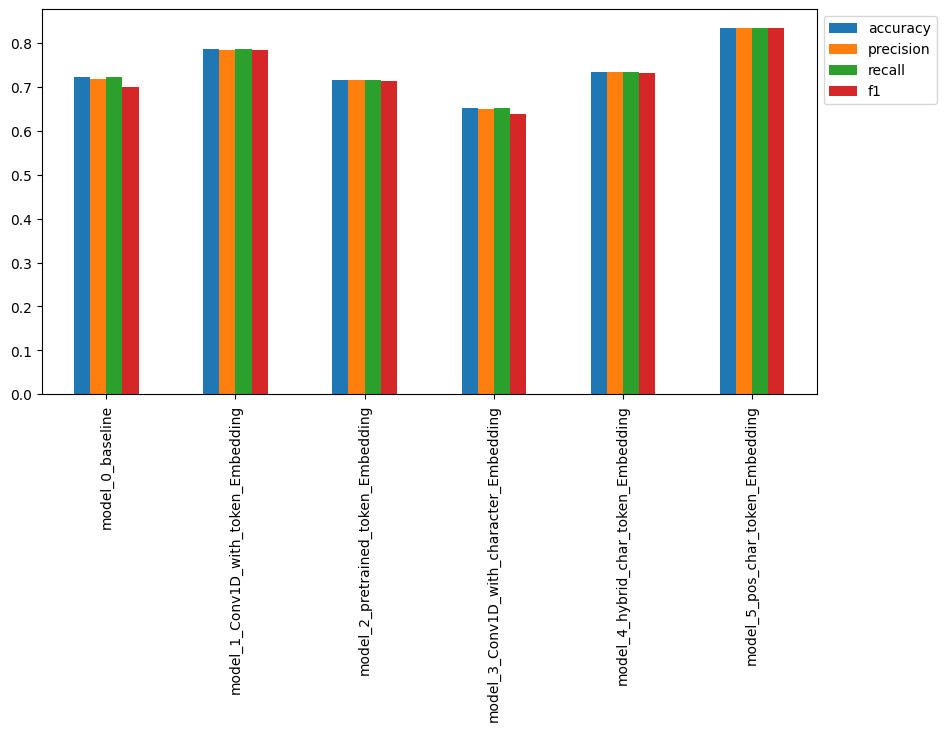

In [ ]:
all_model_results.plot(kind="bar" , figsize=(10 , 5)).legend(bbox_to_anchor=(1.0 , 1.0))

<Axes: >

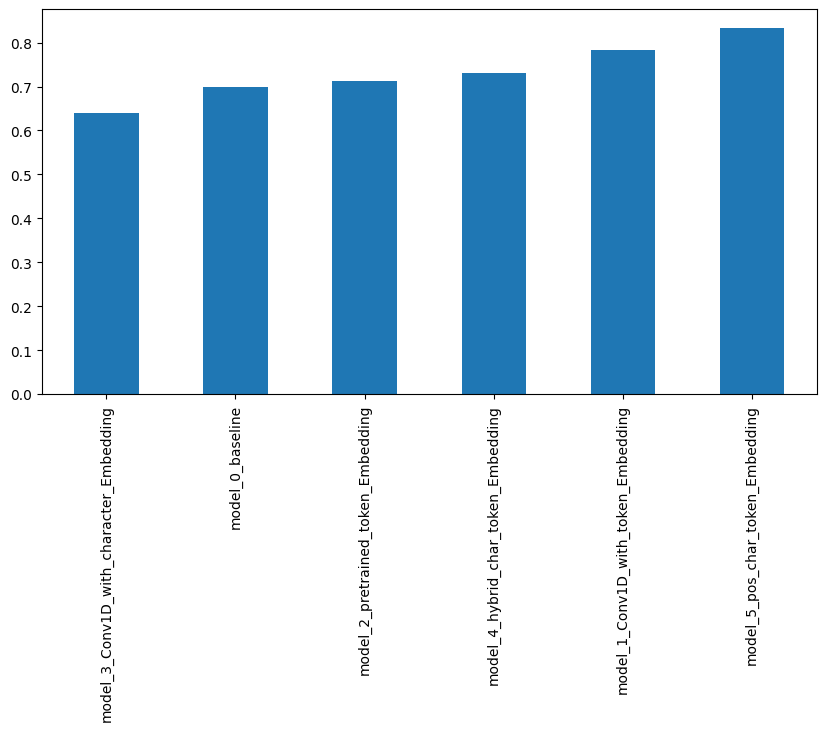

In [ ]:
all_model_results.sort_values("f1" , ascending=True)["f1"].plot(kind="bar" , figsize=(10,5))